## MNIST Classification Medium article



https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from time import time

In [2]:
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [5]:
torch.manual_seed(2)
NUM_EPOCHS = 15
LEARNING_RATE = 1e-3
BATCH_SIZE = 64

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])

In [6]:
trainset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)
valset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valset, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True)

In [7]:
##Understanding the dataset
print("#of images", len(trainset))
image, label = trainset[0]
print(image.shape)
print(label)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)


print(len(trainset)/BATCH_SIZE)
len(trainloader)

#of images 60000
torch.Size([1, 28, 28])
5
torch.Size([64, 1, 28, 28])
torch.Size([64])
937.5


938

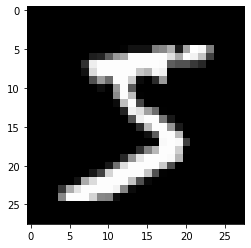

In [8]:
show_data(trainset[0])

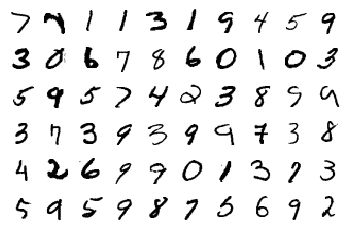

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [10]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
#apperently, logsoftmax() and NLLLOss() together act as cross entropy

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
for e in range(NUM_EPOCHS):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:#else loop runs if the for loop completes without breaking
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6344951644047364
Epoch 1 - Training loss: 0.278763787538957
Epoch 2 - Training loss: 0.21628816918269403
Epoch 3 - Training loss: 0.17368773346556338
Epoch 4 - Training loss: 0.14577065674719145
Epoch 5 - Training loss: 0.12484378558692774
Epoch 6 - Training loss: 0.10774569285672102
Epoch 7 - Training loss: 0.09475558438201322
Epoch 8 - Training loss: 0.08498231979754212
Epoch 9 - Training loss: 0.07636440046496991
Epoch 10 - Training loss: 0.06988606072102449
Epoch 11 - Training loss: 0.06333650771264376
Epoch 12 - Training loss: 0.057865722735634825
Epoch 13 - Training loss: 0.053222252995764684
Epoch 14 - Training loss: 0.049798974971364394

Training Time (in minutes) = 2.1777446150779722


In [13]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
print(ps.shape)
probab = list(ps.numpy()[0])
print(probab)
print("Predicted Digit =", probab.index(max(probab)))
print(labels[0])

torch.Size([1, 10])
[5.8841665e-10, 7.041656e-11, 9.234076e-11, 1.4211136e-05, 4.208376e-07, 1.0948198e-07, 1.5183273e-13, 6.249084e-07, 7.263098e-07, 0.9999839]
Predicted Digit = 9
tensor(9)


In [14]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():# nograd cuz dont need to backprop and its faster
        logps = model(img)

    
    ps = torch.exp(logps)# done because the output are log probabilites so need to take exponential
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 60000

Model Accuracy = 0.9886833333333334
